<a href="https://colab.research.google.com/github/saleemhamo/ecg-data-feature-engineering/blob/main/Feature_Extraction_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import pearsonr
from sklearn.model_selection import LeaveOneGroupOut
import json
import matplotlib.pyplot as plt

### Prepare Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/University/AI & ML - Case Study 3/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/University/AI & ML - Case Study 3


In [ ]:
feature_names = pd.read_csv('feature_names.csv').columns.tolist()
labels = pd.read_csv('labels.csv', names=['label'])
df_data = pd.read_csv('data.csv', header=None, names=feature_names)

# Feature Extraction

## LDA

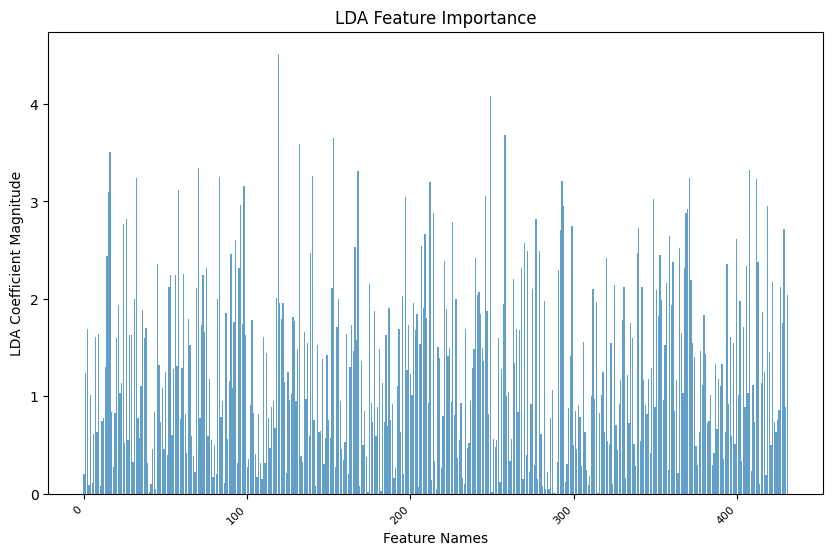

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# # Load data
# df_data = pd.read_csv('data.csv', header=None)
# feature_names = pd.read_csv('feature_names.csv', header=None)
# labels = pd.read_csv('labels.csv', header=None)

# Extract features and labels
X = df_data.values
y = labels.values.flatten()
groups = np.repeat(np.arange(18), 10)  # 18 subjects x 10 repetitions

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize LDA
lda = LinearDiscriminantAnalysis(n_components=1)  # Adjust the number of components as needed

# Apply LDA
X_lda = lda.fit_transform(X_scaled, y)

# Feature importances from LDA
feature_importances = np.abs(lda.coef_).flatten()

# Visualize the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(feature_importances)), feature_importances, alpha=0.7)
ax.set_xlabel('Feature Names')
ax.set_ylabel('LDA Coefficient Magnitude')
ax.set_title('LDA Feature Importance')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()



In [ ]:
for clf, clf_name in zip([svm_clf, knn_clf], ['SVM', 'KNN']):
    print(f"\n--- LDA Feature Extraction ---")
    print(f"\nClassifier: {clf_name}")

    # Initialize Leave-One-Group-Out Cross-Validation iterator
    logo_iterator = logo.split(X_lda, y, groups)

    # Initialize grid search with cross-validation
    if clf_name == 'SVM':
        param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    else:  # KNN
        param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

    grid_search = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=logo_iterator)

    # Fit the model and optimize hyperparameters
    grid_search.fit(X_lda, y)

    # Get the best model
    best_clf = grid_search.best_estimator_

    # Evaluate the model
    predictions = best_clf.predict(X_lda)
    accuracy = accuracy_score(y, predictions)
    confusion_mat = confusion_matrix(y, predictions)

    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion_mat}\n")

NameError: ignored

##Standarizatin + PCA (SVM)

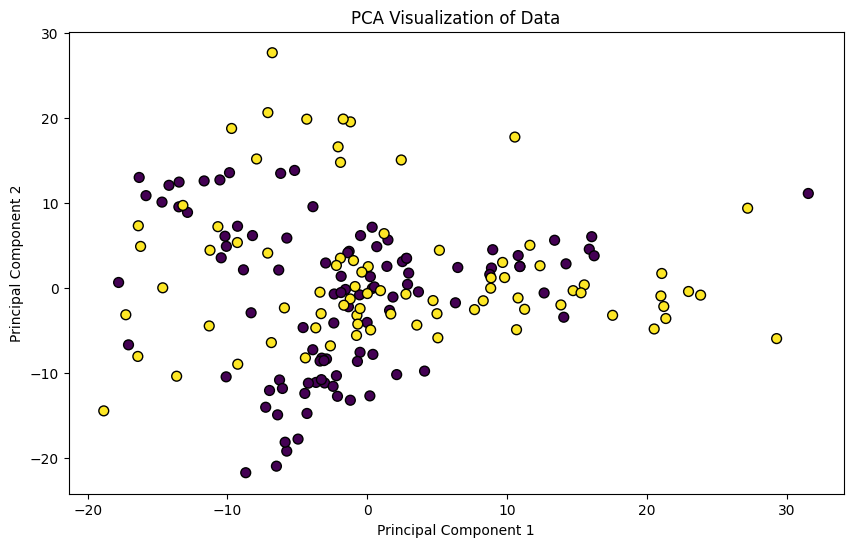

Accuracy: 0.92
Confusion Matrix:
 [[19  2]
 [ 1 14]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.90      0.93        21
         1.0       0.88      0.93      0.90        15

    accuracy                           0.92        36
   macro avg       0.91      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(df_data)

# Perform PCA for feature extraction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Visualize the data in 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels['label'], cmap='viridis', edgecolor='k', s=50)
plt.title('PCA Visualization of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, labels, test_size=0.2, random_state=42)

# Train an SVM classifier
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)


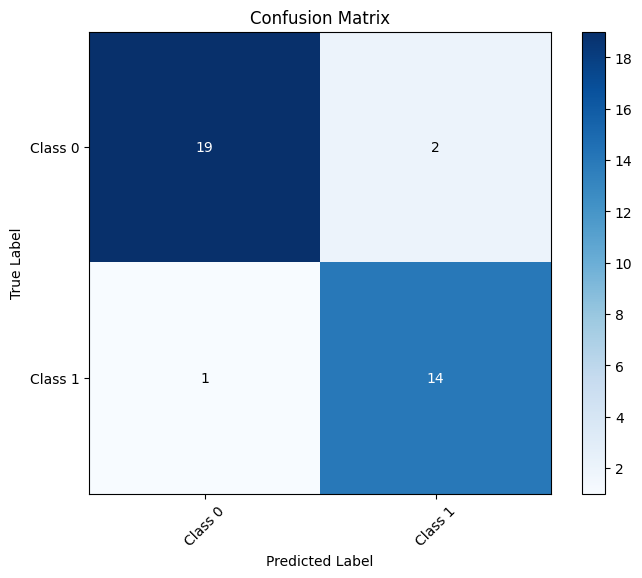

Accuracy: 0.92


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Sample data
accuracy = 0.92
confusion_matrix_data = np.array([[19, 2], [1, 14]])
target_names = ['Class 0', 'Class 1']

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix_data, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations to each cell
for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(confusion_matrix_data[i, j]), ha='center', va='center', color='white' if confusion_matrix_data[i, j] > confusion_matrix_data.max() / 2 else 'black')

plt.show()

# Display Accuracy and Classification Report
print(f'Accuracy: {accuracy:.2f}')


Explanation:

Load Data: Load your feature matrix and corresponding labels.

Standardize Data: Use StandardScaler to standardize the data.

PCA for Feature Extraction: Apply PCA to reduce the dimensionality of the data to two principal components for visualization.

Visualize Data: Visualize the data in 2D using a scatter plot.

Split Data: Split the data into training and testing sets.

Train SVM Classifier: Train a Support Vector Machine (SVM) classifier on the training data.

Make Predictions: Use the trained classifier to make predictions on the test set.

Evaluate Classifier: Print accuracy, confusion matrix, and classification report.

## Singular Value Decomposition (SVD) & Randomized PCA

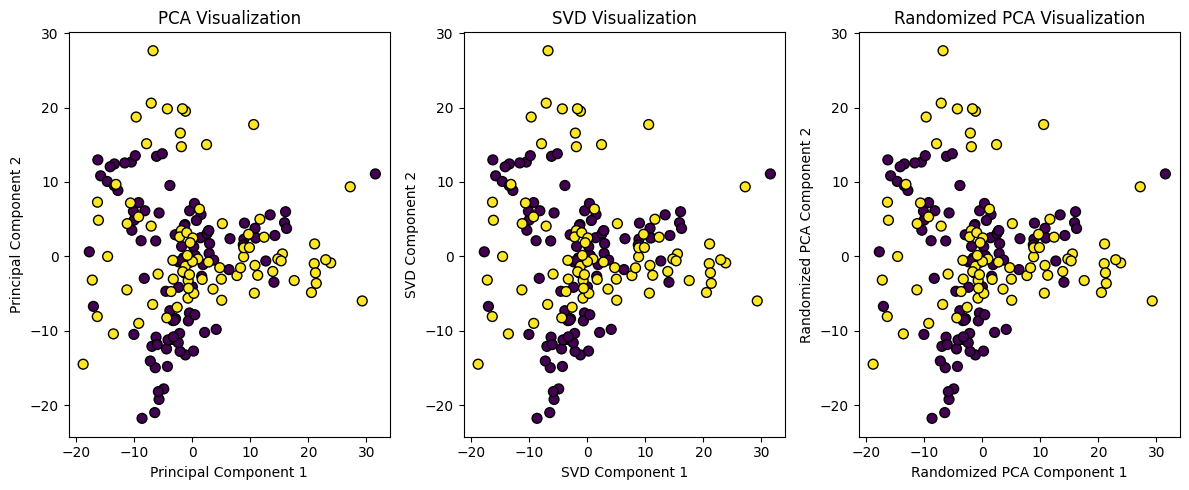

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import TSNE

# Perform SVD for feature extraction
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_standardized)

# Perform Randomized PCA for comparison
rpca = PCA(n_components=2, svd_solver='randomized', random_state=42)
X_rpca = rpca.fit_transform(X_standardized)

# Visualize the data using SVD and Randomized PCA
plt.figure(figsize=(12, 5))

# Plot PCA results
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels['label'], cmap='viridis', edgecolor='k', s=50)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot SVD results
plt.subplot(1, 3, 2)
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels['label'], cmap='viridis', edgecolor='k', s=50)
plt.title('SVD Visualization')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')

# Plot Randomized PCA results
plt.subplot(1, 3, 3)
plt.scatter(X_rpca[:, 0], X_rpca[:, 1], c=labels['label'], cmap='viridis', edgecolor='k', s=50)
plt.title('Randomized PCA Visualization')
plt.xlabel('Randomized PCA Component 1')
plt.ylabel('Randomized PCA Component 2')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train_svd, X_test_svd, y_train, y_test = train_test_split(X_svd, labels['label'], test_size=0.2, random_state=42)
X_train_rpca, X_test_rpca, _, _ = train_test_split(X_rpca, labels['label'], test_size=0.2, random_state=42)

# Train an SVM classifier on the SVD-transformed data
svm_svd = SVC(kernel='linear', C=1)
svm_svd.fit(X_train_svd, y_train)

# Train an SVM classifier on the Randomized PCA-transformed data
svm_rpca = SVC(kernel='linear', C=1)
svm_rpca.fit(X_train_rpca, y_train)

# Make predictions on the test set for both SVMs
y_pred_svd = svm_svd.predict(X_test_svd)
y_pred_rpca = svm_rpca.predict(X_test_rpca)

# Evaluate the classifiers
accuracy_svd = accuracy_score(y_test, y_pred_svd)
accuracy_rpca = accuracy_score(y_test, y_pred_rpca)

conf_matrix_svd = confusion_matrix(y_test, y_pred_svd)
conf_matrix_rpca = confusion_matrix(y_test, y_pred_rpca)

classification_rep_svd = classification_report(y_test, y_pred_svd)
classification_rep_rpca = classification_report(y_test, y_pred_rpca)

# Print results
print("SVM on SVD-transformed data:")
print(f"Accuracy: {accuracy_svd:.2f}")
print("Confusion Matrix:\n", conf_matrix_svd)
print("Classification Report:\n", classification_rep_svd)

print("\nSVM on Randomized PCA-transformed data:")
print(f"Accuracy: {accuracy_rpca:.2f}")
print("Confusion Matrix:\n", conf_matrix_rpca)
print("Classification Report:\n", classification_rep_rpca)


SVM on SVD-transformed data:
Accuracy: 0.56
Confusion Matrix:
 [[12  9]
 [ 7  8]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.57      0.60        21
         1.0       0.47      0.53      0.50        15

    accuracy                           0.56        36
   macro avg       0.55      0.55      0.55        36
weighted avg       0.56      0.56      0.56        36


SVM on Randomized PCA-transformed data:
Accuracy: 0.56
Confusion Matrix:
 [[12  9]
 [ 7  8]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.57      0.60        21
         1.0       0.47      0.53      0.50        15

    accuracy                           0.56        36
   macro avg       0.55      0.55      0.55        36
weighted avg       0.56      0.56      0.56        36



Singular Value Decomposition (SVD): Use TruncatedSVD to perform SVD-based feature extraction. This method is similar to PCA but works on sparse data.

Randomized PCA: Use PCA with the 'randomized' solver for a randomized variant. This can be more efficient for large datasets.

Visualize Results: Visualize the results of PCA, SVD, and Randomized PCA in separate subplots.

## t-SNE for non-linear projection

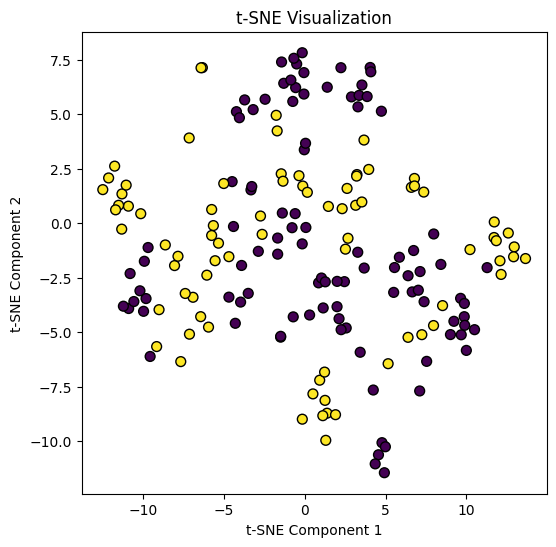

In [ ]:
# Perform t-SNE for non-linear projection
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_standardized)

# Visualize t-SNE results
plt.figure(figsize=(6, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels['label'], cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train_tsne, X_test_tsne, y_train, y_test = train_test_split(X_tsne, labels['label'], test_size=0.2, random_state=42)

# Train an SVM classifier on the t-SNE-transformed data
svm_tsne = SVC(kernel='linear', C=1)
svm_tsne.fit(X_train_tsne, y_train)

# Make predictions on the test set
y_pred_tsne = svm_tsne.predict(X_test_tsne)

# Evaluate the classifier
accuracy_tsne = accuracy_score(y_test, y_pred_tsne)
conf_matrix_tsne = confusion_matrix(y_test, y_pred_tsne)
classification_rep_tsne = classification_report(y_test, y_pred_tsne)

# Print results
print("SVM on t-SNE-transformed data:")
print(f"Accuracy: {accuracy_tsne:.2f}")
print("Confusion Matrix:\n", conf_matrix_tsne)
print("Classification Report:\n", classification_rep_tsne)


SVM on t-SNE-transformed data:
Accuracy: 0.58
Confusion Matrix:
 [[21  0]
 [15  0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.58      1.00      0.74        21
         1.0       0.00      0.00      0.00        15

    accuracy                           0.58        36
   macro avg       0.29      0.50      0.37        36
weighted avg       0.34      0.58      0.43        36



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 non-linear projection methods like t-SNE (t-Distributed Stochastic Neighbor Embedding)

## Binarization

Binarization is the process of converting numerical data into binary values (0 or 1) based on a threshold. For example, you might want to binarize your data to represent whether a certain feature is above or below a certain threshold.

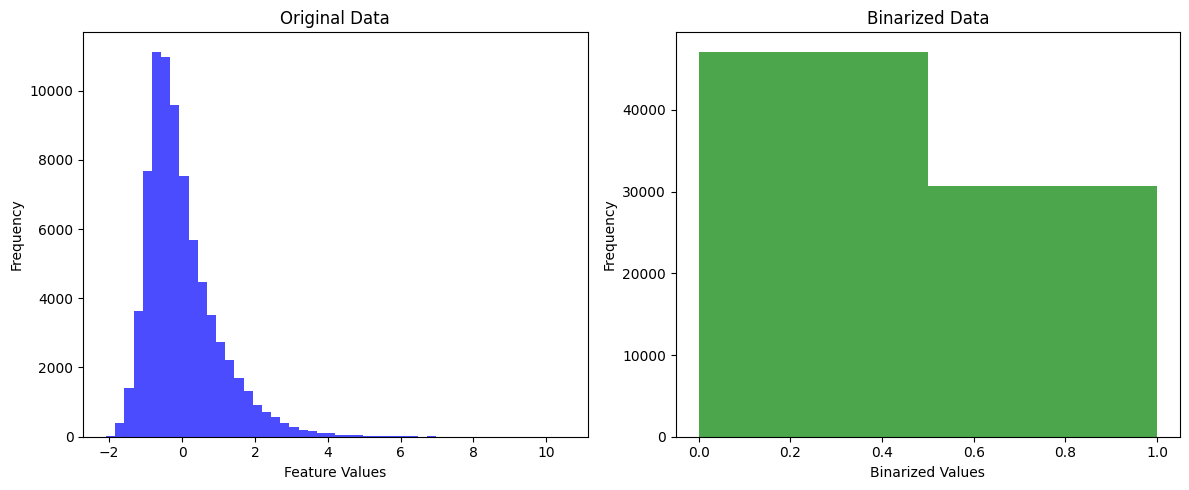

In [ ]:
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt

# Assuming X_standardized is your standardized feature matrix
threshold = 0.0  # Adjust the threshold as needed

binarizer = Binarizer(threshold=threshold)
X_binarized = binarizer.transform(X_standardized)

# Visualize the original and binarized data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Original Data')
plt.hist(X_standardized.flatten(), bins=50, color='blue', alpha=0.7)
plt.xlabel('Feature Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.title('Binarized Data')
plt.hist(X_binarized.flatten(), bins=2, color='green', alpha=0.7)
plt.xlabel('Binarized Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train_bin, X_test_bin, y_train, y_test = train_test_split(X_binarized, labels['label'], test_size=0.2, random_state=42)

# Train an SVM classifier on the binarized data
svm_bin = SVC(kernel='linear', C=1)
svm_bin.fit(X_train_bin, y_train)

# Make predictions on the test set
y_pred_bin = svm_bin.predict(X_test_bin)

# Evaluate the classifier
accuracy_bin = accuracy_score(y_test, y_pred_bin)
conf_matrix_bin = confusion_matrix(y_test, y_pred_bin)
classification_rep_bin = classification_report(y_test, y_pred_bin)

# Print results
print("SVM on Binarized data:")
print(f"Accuracy: {accuracy_bin:.2f}")
print("Confusion Matrix:\n", conf_matrix_bin)
print("Classification Report:\n", classification_rep_bin)


NameError: ignored

## One-Hot Encoding

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


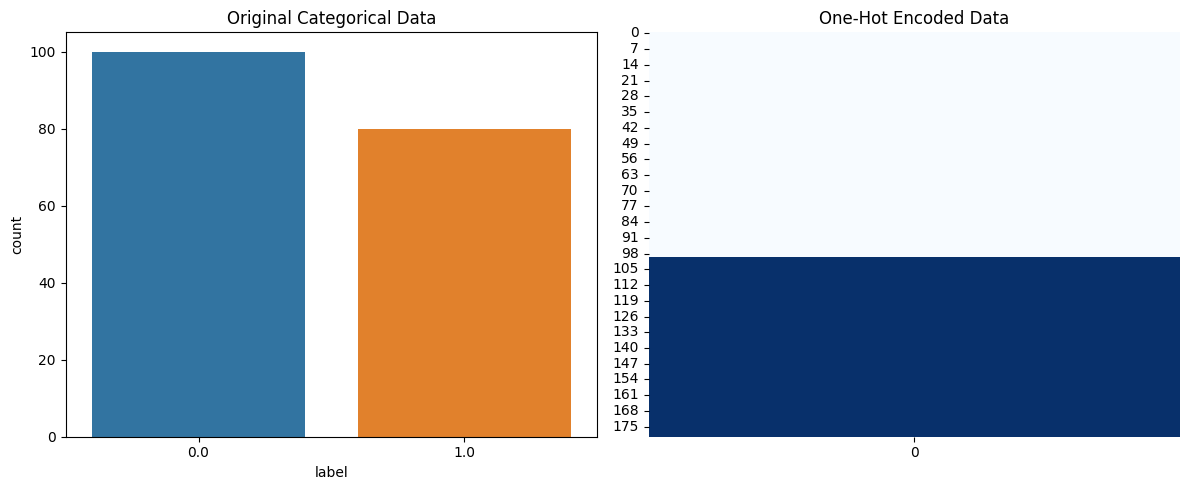

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

# Assuming 'categorical_column' is the column containing categorical data in X_standardized
categorical_column = 'label'

# Extract the categorical column
# categorical_data = X_standardized[[categorical_column]]
categorical_data = labels

# Apply one-hot encoding
encoder = OneHotEncoder(sparse=False, drop='first')
X_onehot = encoder.fit_transform(categorical_data)

# Visualize the original and one-hot encoded data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Original Categorical Data')
sns.countplot(data=categorical_data, x=categorical_column)

plt.subplot(1, 2, 2)
plt.title('One-Hot Encoded Data')
sns.heatmap(X_onehot, cmap='Blues', cbar=False)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train_onehot, X_test_onehot, y_train, y_test = train_test_split(X_onehot, labels['label'], test_size=0.2, random_state=42)

# Train an SVM classifier on the one-hot encoded data
svm_onehot = SVC(kernel='linear', C=1)
svm_onehot.fit(X_train_onehot, y_train)

# Make predictions on the test set
y_pred_onehot = svm_onehot.predict(X_test_onehot)

# Evaluate the classifier
accuracy_onehot = accuracy_score(y_test, y_pred_onehot)
conf_matrix_onehot = confusion_matrix(y_test, y_pred_onehot)
classification_rep_onehot = classification_report(y_test, y_pred_onehot)

# Print results
print("SVM on One-Hot Encoded data:")
print(f"Accuracy: {accuracy_onehot:.2f}")
print("Confusion Matrix:\n", conf_matrix_onehot)
print("Classification Report:\n", classification_rep_onehot)


SVM on One-Hot Encoded data:
Accuracy: 1.00
Confusion Matrix:
 [[21  0]
 [ 0 15]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        15

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Cropping (Temporal Sliding Windows)

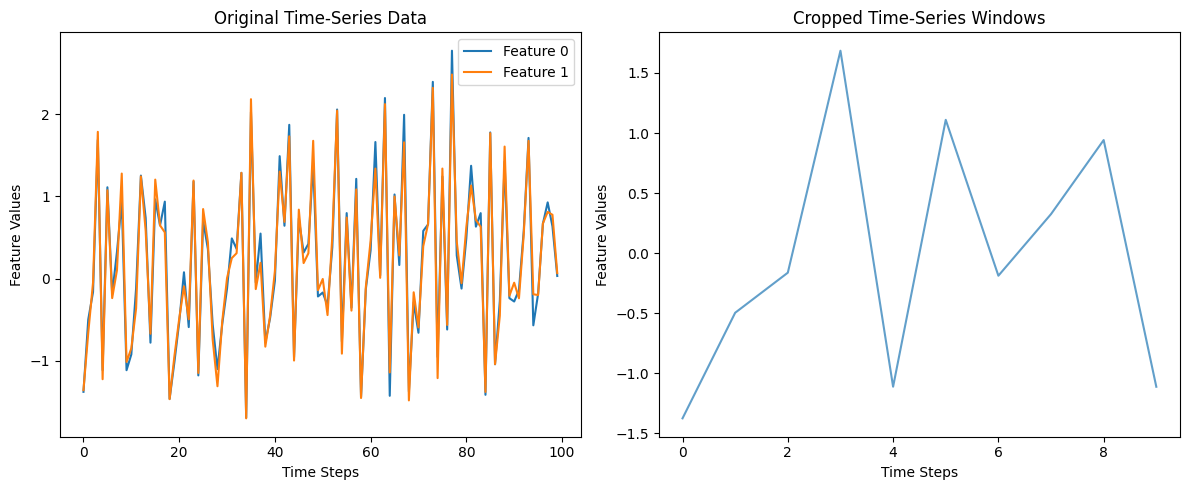

In [ ]:
# Assuming X_standardized is your time-series data
window_size = 10  # Adjust the window size as needed
stride = 1  # Adjust the stride as needed
num_samples = 10
# Create temporal sliding windows
X_windows = [X_standardized[i:i+window_size, :] for i in range(0, num_samples - window_size + 1, stride)]

# Visualize the original and cropped data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Original Time-Series Data')
plt.plot(X_standardized[:100, 0], label='Feature 0')
plt.plot(X_standardized[:100, 1], label='Feature 1')
plt.xlabel('Time Steps')
plt.ylabel('Feature Values')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Cropped Time-Series Windows')
for window in X_windows:
    plt.plot(window[:, 0], alpha=0.7)
plt.xlabel('Time Steps')
plt.ylabel('Feature Values')

plt.tight_layout()
plt.show()


## Aggregation (Empirical Cumulative Density)

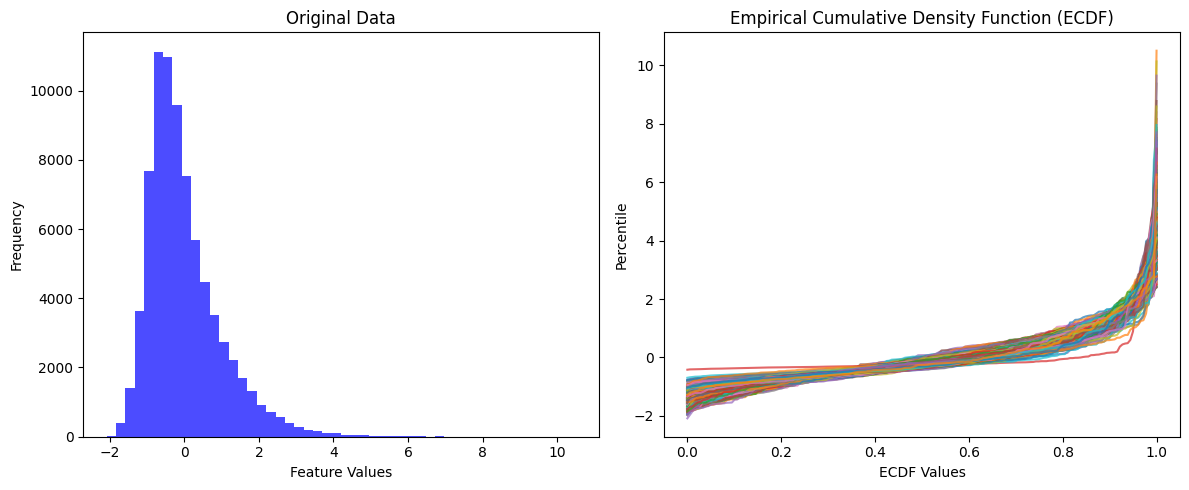

In [ ]:
# Assuming X_standardized is your data
ecdf_values = np.linspace(0, 1, len(X_standardized))
ecdf_data = np.percentile(X_standardized, ecdf_values * 100, axis=0)

# Visualize the original and ECDF data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Original Data')
plt.hist(X_standardized.flatten(), bins=50, color='blue', alpha=0.7)
plt.xlabel('Feature Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.title('Empirical Cumulative Density Function (ECDF)')
for i in range(ecdf_data.shape[1]):
    plt.plot(ecdf_values, ecdf_data[:, i], label=f'Feature {i}', alpha=0.7)
plt.xlabel('ECDF Values')
plt.ylabel('Percentile')
# plt.legend()

plt.tight_layout()
plt.show()
